In [1]:
import pandas as pd
import matplotlib.pyplot as plt
helmet_df = pd.read_excel("C:/Users/Shanmukha Reddy/Desktop/FDS/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by Victims during the calendar year 2017-2022.xlsx")
helmet_df.head(222)

,S.No,States/Uts,Drivers_PersonsKilled_Number,Drivers_PersonsKilled_Rank,Drivers_PersonsInjured_GrevioslyInjured,Drivers_PersonsInjured_MinorInjured,Drivers_Total Injured,Passengers_PersonsKilled_Number,Passengers_PersonsKilled_Rank,Passengers_PersonsInjured_GreviouslyInjured,Passengers_PersonsInjured_MinorInjured,Passengers_PersonsInjured_Total Injured,Year
0,1,Andhra Pradesh,441,5,916,2016,2932,432,10,810,1540,2350,2017
1,2,Andhra Pradesh,395,9,433,801,1234,451,11,416,1358,1774,2018
2,3,Andhra Pradesh,335,10,218,585,803,376,11,287,1174,1461,2019
3,4,Andhra Pradesh,230,14,153,389,542,242,11,118,754,872,2020
4,5,Andhra Pradesh,241,12,106,474,580,231,12,130,708,838,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,218,Puducherry,2,31,7,35,42,6,31,8,50,58,2018
218,219,Puducherry,0,32,2,5,7,18,24,34,173,207,2019
219,220,Puducherry,0,31,1,2,3,14,22,27,115,142,2020
220,221,Puducherry,0,33,8,14,22,0,34,1,2,3,2021


In [2]:
 helmet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   S.No                                         222 non-null    int64 
 1   States/Uts                                   222 non-null    object
 2   Drivers_PersonsKilled_Number                 222 non-null    int64 
 3   Drivers_PersonsKilled_Rank                   222 non-null    int64 
 4   Drivers_PersonsInjured_GrevioslyInjured      222 non-null    int64 
 5   Drivers_PersonsInjured_MinorInjured          222 non-null    int64 
 6   Drivers_Total Injured                        222 non-null    int64 
 7   Passengers_PersonsKilled_Number              222 non-null    int64 
 8   Passengers_PersonsKilled_Rank                222 non-null    int64 
 9   Passengers_PersonsInjured_GreviouslyInjured  222 non-null    int64 
 10  Passengers_Per

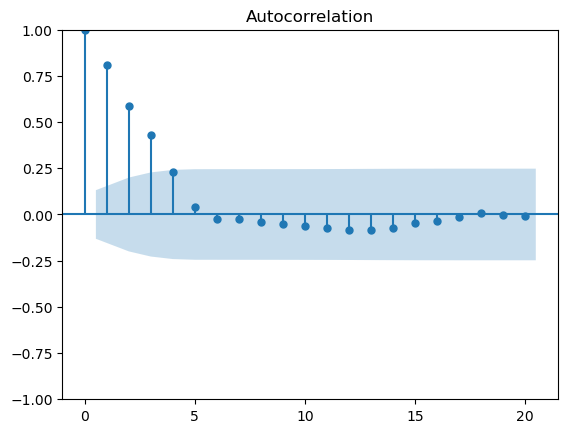

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset
file_path = "C:/Users/Shanmukha Reddy/Desktop/FDS/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by Victims during the calendar year 2017-2022.xlsx"
accidents_df = pd.read_excel(file_path)

# Clean the dataset by dropping rows with missing 'States/Uts' or 'Year' values
cleaned_accidents_df = accidents_df.dropna(subset=['States/Uts', 'Year'])

# Extract the 'Drivers_PersonsKilled_Number' column for autocorrelation analysis
drivers_killed_series = cleaned_accidents_df['Drivers_PersonsKilled_Number']

# Plot autocorrelation up to lag 20 for the number of drivers killed
acf_plot = plot_acf(drivers_killed_series, lags=20)

# Show the plot
plt.show()


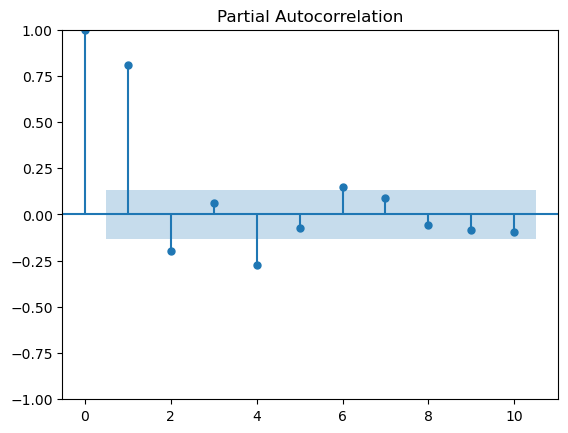

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Load the dataset
file_path ="C:/Users/Shanmukha Reddy/Desktop/FDS/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by Victims during the calendar year 2017-2022.xlsx"
accidents_df = pd.read_excel(file_path)

# Clean the dataset by dropping rows with missing 'States/Uts' or 'Year' values
cleaned_accidents_df = accidents_df.dropna(subset=['States/Uts', 'Year'])

# Extract the 'Drivers_PersonsKilled_Number' column for autocorrelation analysis
drivers_killed_series = cleaned_accidents_df['Drivers_PersonsKilled_Number']

# Adjust the number of lags to be less than half of the dataset size
max_lags = min(drivers_killed_series.shape[0] // 2 - 1, 10)  # Limiting to 10 lags or fewer

# Plot partial autocorrelation with the adjusted number of lags
pacf_plot = plot_pacf(drivers_killed_series, lags=max_lags)

# Show the plot
plt.show()


In [5]:
from statsmodels.tsa.arima_model import ARIMA

In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "C:/Users/Shanmukha Reddy/Desktop/FDS/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by Victims during the calendar year 2017-2022.xlsx"
accidents_df = pd.read_excel(file_path)

# Clean the dataset by dropping rows with missing 'States/Uts' or 'Year' values
cleaned_accidents_df = accidents_df.dropna(subset=['States/Uts', 'Year'])

# Extract the 'Drivers_PersonsKilled_Number' column for ARIMA modeling
drivers_killed_series = cleaned_accidents_df['Drivers_PersonsKilled_Number'].astype(np.float64).to_numpy()

# Fit the ARIMA model (order=(1, 0, 0) as in your original example)
arima = ARIMA(drivers_killed_series, order=(1, 0, 0))
ar_model = arima.fit()

# Print the model summary
print(ar_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1512.477
Date:                Tue, 03 Sep 2024   AIC                           3030.954
Time:                        21:15:07   BIC                           3041.162
Sample:                             0   HQIC                          3035.075
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0348    112.788      1.969      0.049       0.975     443.094
ar.L1          0.8075      0.023     35.209      0.000       0.763       0.852
sigma2      4.821e+04   1607.374     29.991      0.0

In [7]:
# Forecast for a range of values (e.g., from index 30 to 36)
# Adjust the indices based on the size of your dataset
forecast_start = 30
forecast_end = 36

# Ensure the dataset has enough points for forecasting
if len(drivers_killed_series) > forecast_start:
    forecast_31_37 = ar_model.predict(forecast_start, forecast_end)
    print("Forecasted values:", forecast_31_37)
else:
    print(f"Not enough data points to forecast from index {forecast_start} to {forecast_end}.")


Forecasted values: [300.33143712  46.78536641  47.59283797  46.78536641  44.36295172
  45.17042328  42.74800859]


In [8]:
import numpy as np

def get_mape(actual, forecast):
    """
    Calculate Mean Absolute Percentage Error (MAPE), avoiding division by zero.
    """
    actual, forecast = np.array(actual), np.array(forecast)
    
    # Filter out zero actual values to avoid division by zero
    non_zero_indices = actual != 0
    
    # Ensure the lengths match after filtering
    actual = actual[non_zero_indices]
    forecast = forecast[:len(actual)]  # Adjust the forecast length to match the actual values
    
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Assuming forecast_31_37 contains the forecasted values for the last 6 data points
# We'll compare these forecasts with the actual values from the same range
actual_values = drivers_killed_series[forecast_start:forecast_end+1]

# Calculate MAPE
mape = get_mape(actual_values, forecast_31_37)
print(f"MAPE: {mape}%")


MAPE: 1857.8107469075526%


In [9]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert the 'Drivers_PersonsKilled_Number' column to a numpy array and fit an MA model
ma_model = ARIMA(drivers_killed_series.astype(np.float64), order=(0, 0, 1)).fit()

# Print the summary of the model
print(ma_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1545.819
Date:                Tue, 03 Sep 2024   AIC                           3097.638
Time:                        21:15:33   BIC                           3107.846
Sample:                             0   HQIC                          3101.759
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0054     43.208      5.138      0.000     137.319     306.692
ma.L1          0.7567      0.037     20.347      0.000       0.684       0.830
sigma2      6.516e+04   4058.421     16.055      0.0

In [10]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert the 'Drivers_PersonsKilled_Number' column to a numpy array and fit an ARMA model
arma_model = ARIMA(drivers_killed_series.astype(np.float64), order=(1, 0, 1)).fit()

# Print the summary of the model
print(arma_model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1506.778
Date:                Tue, 03 Sep 2024   AIC                           3021.556
Time:                        21:15:43   BIC                           3035.167
Sample:                             0   HQIC                          3027.051
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0384     90.054      2.466      0.014      45.536     398.541
ar.L1          0.6977      0.035     20.194      0.000       0.630       0.765
ma.L1          0.3245      0.044      7.352      0.0

In [11]:
# Forecast using the fitted ARMA model
forecast_31_37 = arma_model.predict(30, 36)

# Extract the actual values for comparison
# Adjust the length of actual_values to match the forecast length
actual_values = drivers_killed_series[30:37]  # Adjust to the range of indices corresponding to the forecast

# Define the MAPE function
def get_mape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    non_zero_indices = actual != 0  # Avoid division by zero
    actual = actual[non_zero_indices]
    forecast = forecast[non_zero_indices]
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Calculate MAPE using the actual and forecasted values
mape = get_mape(actual_values, forecast_31_37)
print(f"MAPE: {mape}%")


MAPE: 1961.9041860226498%
